In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data 1

In [2]:
data1 = pd.read_csv("data1.csv")
data1['date'] = data1['date'].apply(lambda x: x.split(',')[1])
data1.sort_values("userscore", axis = 0, ascending = False, inplace = True)
data1 = data1[data1.userscore != "tbd"]
data1.set_index(["userscore"], inplace = True)
data1.rename(columns = {'name':'title'})
data1

,metascore,name,console,date
userscore,,,,
9.4,89,Final Fantasy Chronicles,PS,2001
9.3,93,The Witcher 3: Wild Hunt,PC,2015
9.3,74,The Legend of Dragoon,PS,2000
9.3,91,Resident Evil,GC,2002
9.3,87,Bloodborne: The Old Hunters,PS4,2015
9.3,96,Resident Evil 4,GC,2005
9.3,92,Final Fantasy VI Advance,GBA,2007
9.2,94,Final Fantasy IX,PS,2000
9.2,95,Baldur's Gate II: Shadows of Amn,PC,2000


### Data 2

In [44]:
data2 = pd.read_csv("data2.csv")

data2 = data2.drop(['Publisher', 'Genre', 'Rating', 'Developer','NA_Sales','EU_Sales','JP_Sales'], axis = 1)

# change year, critic and user count to int
# put 0 for NaN values
data2['Year_of_Release'] = data2['Year_of_Release'].fillna(0).apply(np.int64)
data2['Critic_Count'] = data2['Critic_Count'].fillna(0).apply(np.int64)
data2['User_Count'] = data2['User_Count'].fillna(0).apply(np.int64)

# drop user < 50 and critic < 10 count
# drop global sales < 0.1 m (not currently)
data2  = data2[data2.User_Count > 0]
data2  = data2[data2.Critic_Count > 0]

list = ['Other_Sales','Critic_Count','User_Count']
data2 = data2.drop(list,axis = 1)
data2 = data2.rename(columns= {'Name':'title'})
data2 = data2.rename(columns = {'Year_of_Release':'release_Date', 'Global_Sales':'tot_sale','Platform':'console','User_Score':'user_Score'})


data2 = data2[data2.Critic_Score > 0.0]
data2

,title,console,release_Date,tot_sale,Critic_Score,user_Score
0,Wii Sports,Wii,2006,82.53,76.0,8
2,Mario Kart Wii,Wii,2008,35.52,82.0,8.3
3,Wii Sports Resort,Wii,2009,32.77,80.0,8
6,New Super Mario Bros.,DS,2006,29.80,89.0,8.5
7,Wii Play,Wii,2006,28.92,58.0,6.6
8,New Super Mario Bros. Wii,Wii,2009,28.32,87.0,8.4
11,Mario Kart DS,DS,2005,23.21,91.0,8.6
13,Wii Fit,Wii,2007,22.70,80.0,7.7
14,Kinect Adventures!,X360,2010,21.81,61.0,6.3
15,Wii Fit Plus,Wii,2009,21.79,80.0,7.4


### Data 3

In [5]:
data3 = pd.read_csv("data3Revised.csv")
# editing release data column 
for i in range(19998) :
    if data3.release_Date[i] != 'N/A  ':
        if int(data3.release_Date[i][9:]) < 20:
            data3.release_Date[i] = int('20' + data3.release_Date[i][9:])
        else: 
            data3.release_Date[i] = int('19' + data3.release_Date[i][9:])
    data3.keydata[i] = data3.keydata[i][:-1]
data3

C:\Users\jongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\jongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,title,user_Score,release_Date,console,publisher,developer,tot_ship,tot_sale,na_sale,pal_sale,keydata,other_sale,last_update,VGscore
0,0,Wii Sports,N/A,2006,Wii,Nintendo,Nintendo EAD,82.87m,NaN,NaN,NaN,82.87,NaN,NaN,N/A
1,1,Super Mario Bros.,8.2,1985,NES,Nintendo,Nintendo EAD,40.24m,NaN,NaN,NaN,40.24,NaN,NaN,N/A
2,2,Mario Kart Wii,9.1,2008,Wii,Nintendo,Nintendo EAD,37.20m,NaN,NaN,NaN,37.20,NaN,11th Apr 18,8.7
3,3,PlayerUnknown's Battlegrounds,N/A,2017,PC,PUBG Corporation,PUBG Corporation,36.60m,NaN,NaN,NaN,36.60,NaN,13th Nov 18,N/A
4,4,Wii Sports Resort,8.8,2009,Wii,Nintendo,Nintendo EAD,33.10m,NaN,NaN,NaN,33.10,NaN,NaN,8.8
5,5,Pokémon Red / Green / Blue Version,N/A,1998,GB,Nintendo,Game Freak,31.38m,NaN,NaN,NaN,31.38,NaN,NaN,N/A
6,6,New Super Mario Bros.,8.1,2006,DS,Nintendo,Nintendo EAD,30.80m,NaN,NaN,NaN,30.80,NaN,NaN,N/A
7,7,New Super Mario Bros. Wii,9.2,2009,Wii,Nintendo,Nintendo EAD,30.26m,NaN,NaN,NaN,30.26,NaN,NaN,9.1
8,8,Tetris,N/A,1989,GB,Nintendo,Bullet Proof Software,30.26m,NaN,NaN,NaN,30.26,NaN,NaN,N/A
9,9,Minecraft,N/A,2010,PC,Mojang,Mojang AB,30.01m,NaN,NaN,NaN,30.01,NaN,05th Aug 18,N/A


In [8]:
# drop unnecessary columns
rid_list = ['developer','publisher','na_sale','pal_sale','other_sale','last_update','Unnamed: 0','tot_ship','VGscore','tot_sale']
data3 = data3.drop(rid_list,axis = 1)

data3 = data3.rename(columns={'keydata':'tot_sale'})
data3

,title,user_Score,release_Date,console,tot_sale
0,Wii Sports,N/A,2006,Wii,82.87
1,Super Mario Bros.,8.2,1985,NES,40.24
2,Mario Kart Wii,9.1,2008,Wii,37.20
3,PlayerUnknown's Battlegrounds,N/A,2017,PC,36.60
4,Wii Sports Resort,8.8,2009,Wii,33.10
5,Pokémon Red / Green / Blue Version,N/A,1998,GB,31.38
6,New Super Mario Bros.,8.1,2006,DS,30.80
7,New Super Mario Bros. Wii,9.2,2009,Wii,30.26
8,Tetris,N/A,1989,GB,30.26
9,Minecraft,N/A,2010,PC,30.01


In [46]:
#data3.tot_sale = int(data3.tot_sale[])
print(data3.columns)
print(data2.dtypes)
print(data3.dtypes)
merge_list = ['title','console','release_Date','tot_sale','user_Score']
data3.tot_sale = data3.tot_sale.apply(np.float64)

combo2 = pd.merge(data2, data3, on= merge_list, how = 'outer' ,indicator=False)
combo2 = combo2[combo2.user_Score != 'N/A  ']
combo2 = combo2[combo2.Critic_Score != 'nan']
combo2['user_Score']=pd.to_numeric(combo2['user_Score'])
combo2['user_Score']=combo2['user_Score']*10

combo2 = combo2.dropna()
combo2

Index(['title', 'user_Score', 'release_Date', 'console', 'tot_sale'], dtype='object')
title            object
console          object
release_Date      int64
tot_sale        float64
Critic_Score    float64
user_Score       object
dtype: object
title            object
user_Score       object
release_Date     object
console          object
tot_sale        float64
dtype: object


,title,console,release_Date,tot_sale,Critic_Score,user_Score
0,Wii Sports,Wii,2006,82.53,76.0,80.0
1,Mario Kart Wii,Wii,2008,35.52,82.0,83.0
2,Wii Sports Resort,Wii,2009,32.77,80.0,80.0
3,New Super Mario Bros.,DS,2006,29.80,89.0,85.0
4,Wii Play,Wii,2006,28.92,58.0,66.0
5,New Super Mario Bros. Wii,Wii,2009,28.32,87.0,84.0
6,Mario Kart DS,DS,2005,23.21,91.0,86.0
7,Wii Fit,Wii,2007,22.70,80.0,77.0
8,Kinect Adventures!,X360,2010,21.81,61.0,63.0
9,Wii Fit Plus,Wii,2009,21.79,80.0,74.0


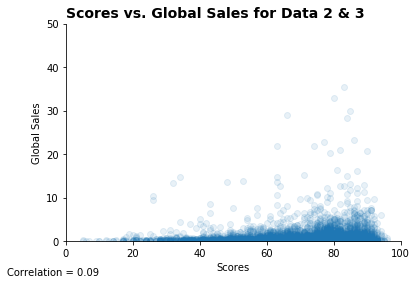

In [52]:
fig, ax = plt.subplots()

ax.scatter(combo2["user_Score"], combo2["tot_sale"],alpha= 0.1) 

ax.set_title('Scores vs. Global Sales for Data 2 & 3', loc='left', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Scores")
ax.set_ylabel("Global Sales")

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.set_ylim(0,50) 
ax.set_xlim(0,100) 

corr_mat = combo2.corr(user_Score)
cr = corr_mat.user_Score.tot_sale

message = "Correlation = " + str(round(cr,2)) 

ax.text(10, -8, message, horizontalalignment='right')

plt.show()

In [53]:
corr_mat

,tot_sale,Critic_Score,user_Score
tot_sale,1.000000,0.236953,0.088583
Critic_Score,0.236953,1.000000,0.580878
user_Score,0.088583,0.580878,1.000000


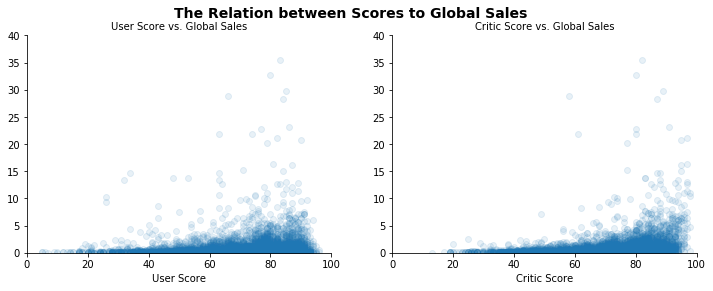

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

#labels
fig.suptitle("The Relation between Scores to Global Sales", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 10) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 10)

count = 0
name_list = ['user_Score','Critic_Score']
for var in ax: 
    var.scatter(combo2[name_list[count]], combo2["tot_sale"],alpha= 0.1)
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()